# Artifical Neutral Network 
## Objectives: 
Using Artifical Neutral Network (ANN) to: 
* learn and train based on the matrix of features by building neutral network layers 
* apply stochastic gradient descent to minimise the lose function
* complete backpropagation to adjusts the weights 
* complete parameter tuning if necessary 

## Steps: 
1) Visualise the dataset, categorical encoding and feature scaling

2) Initialise ANN
    
3) Add first layer with the  11 input nodes and 6 hidden nodes,, set activation function 

4) Add second hidden layer to improve model's accuracy 
  
5) Add output layer in the form of perceptron and a sigmoid function

6) Apply stochastic gradient descent to achieve a set of optimal weights

7) Evaluate the model, visualise the analysis results

Scenario: To build a predictive model for a bank to predict whether the customers will close the bank account or not.

### Dataset: 

Customers_Bank_Accounts: info on customers' bank accounts

Matrix of Features: 10,001 x 14

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Customers_Bank_Accounts.csv')

In [3]:
#inspect dataset
df.shape
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

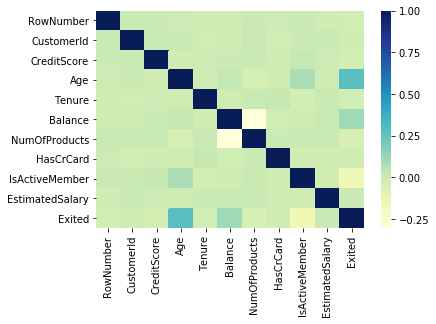

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGnBu')
plt.show()

In [6]:
#drop columns = customerID, Row Number and Surname
X = df.iloc[:, 3:13].values  
Y = df.iloc[:, 13].values  

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder() 
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) # encoding countries 
labelencoder_X_2 = LabelEncoder() 
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) # encoding gender
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
# avoid dummy variable trap - remove first column generated from countries encoding
X = X[:, 1:] 

In [8]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

## Feature Scaling 
* Apply Feature Scaling for data required Eculidean distance calculations
* Most regression library already support scaling by default
* Apply Feature Scaling for ANN (since ANN requires a lot of computation)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

In [10]:
import keras
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


## Initialising the ANN as sequence of layers

In [11]:
classifier = Sequential()  

## Adding the first layer
* Randomly initialise all weights to be uniformly distributed and as close to 0 (but not 0) as possible
* Input first observation of dataset in the input layer, each feature in one input node, by setting input dimensions (number of independent variables)
* Define the nodes for output layer. Parameter tuning using k-fold cross validation could be completed at later stage if necessary. As an initial test, a good practise is simply to half the total number of dependent and independent variables.

In [12]:
classifier.add(Dense(input_dim = 11, units = 6, kernel_initializer = 'glorot_uniform', activation = 'relu'))

## Adding the second hidden layer

In [13]:
# to improve model's accuracy 
classifier.add(Dense(units = 6, activation = 'relu'))

## Adding the output layer - Perceptron
* 1 node (binary output for customer will leave the bank or not) 
* An activation function using signmoid for computing the probability in a logistic regression model

In [14]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Applying Stochastic Gradient Descent
* Adam is a variant of SGD for its effeciency and the coresponding loss function to be optimsed in order to achieve a set of optimal weights of the ANN. 
* The loss function for adam SGD is Logarithmic Loss. 
* For a binary classification outcome, the loss = binary_crossentropy. 
* For a categorical outcome, the loss = categorical_crossentrophy. 
* During each Epoch (observations) training, after all weights have been updated, accuracy metric is used to improve the model. 

In [15]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
# Callback
from keras.callbacks import History
histories = History()

In [17]:
# FItting the ANN to the Training set 
### Run a batch size of 10 observations before all the weights are updated. 
classifier.fit(X_train,Y_train, batch_size = 10, epochs = 100, callbacks = [histories])

Epoch 1/100
8000/8000 [==============================] - 2s 245us/step - loss: 0.5409 - acc: 0.7632
Epoch 2/100
8000/8000 [==============================] - 2s 246us/step - loss: 0.4446 - acc: 0.8001
Epoch 3/100
8000/8000 [==============================] - 2s 232us/step - loss: 0.4281 - acc: 0.8127
Epoch 4/100
8000/8000 [==============================] - 2s 231us/step - loss: 0.4188 - acc: 0.8197
Epoch 5/100
8000/8000 [==============================] - 2s 247us/step - loss: 0.4089 - acc: 0.8252
Epoch 6/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.3948 - acc: 0.8315
Epoch 7/100
8000/8000 [==============================] - 2s 242us/step - loss: 0.3801 - acc: 0.8414
Epoch 8/100
8000/8000 [==============================] - 2s 243us/step - loss: 0.3668 - acc: 0.8494
Epoch 9/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.3570 - acc: 0.8535
Epoch 10/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.3499 - acc: 0.8575

8000/8000 [==============================] - 2s 229us/step - loss: 0.3315 - acc: 0.8646
Epoch 82/100
8000/8000 [==============================] - 2s 224us/step - loss: 0.3312 - acc: 0.8661
Epoch 83/100
8000/8000 [==============================] - 2s 224us/step - loss: 0.3313 - acc: 0.8635
Epoch 84/100
8000/8000 [==============================] - 2s 227us/step - loss: 0.3306 - acc: 0.8657
Epoch 85/100
8000/8000 [==============================] - 2s 230us/step - loss: 0.3311 - acc: 0.8647
Epoch 86/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.3307 - acc: 0.8646
Epoch 87/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.3306 - acc: 0.8641
Epoch 88/100
8000/8000 [==============================] - 2s 222us/step - loss: 0.3309 - acc: 0.8657
Epoch 89/100
8000/8000 [==============================] - 2s 222us/step - loss: 0.3306 - acc: 0.8655
Epoch 90/100
8000/8000 [==============================] - 2s 222us/step - loss: 0.3310 - acc: 0.8656
Epo

## Evaluating the model	

In [18]:
score = classifier.evaluate(X_test, Y_test, verbose=0)
print('\nThe {0} function of the test set is: {1:0.3}'.format(classifier.metrics_names[0],score[0]))
print('The {0} of the test set is: {1:0.3%}'.format(classifier.metrics_names[1],score[1]))

score = classifier.evaluate(X_train, Y_train, verbose=0)
print('\nThe {0} function of the training set is: {1:0.3}'.format(classifier.metrics_names[0],score[0]))
print('The {0} of the training set is: {1:0.3%}'.format(classifier.metrics_names[1],score[1]))


The loss function of the test set is: 0.331
The acc of the test set is: 86.200%

The loss function of the training set is: 0.327
The acc of the training set is: 86.675%


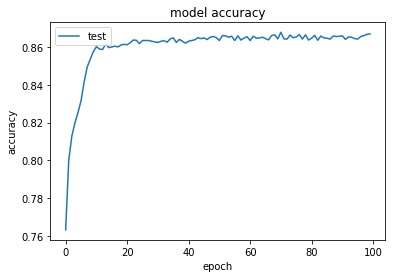

In [19]:
# summarize history for accuracy
plt.plot(histories.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

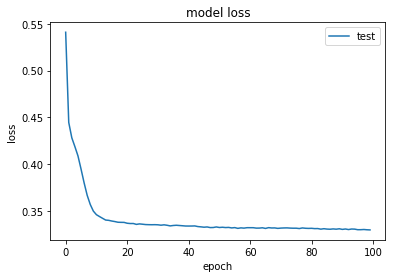

In [20]:
# summarize history for loss
plt.plot(histories.history['loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

## Making the predictions and Completing the Confusion Matrix

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test) # predict y based on X_test (2000 test samples)
y_pred = (y_pred > 0.5) # set a theshold, return TRUE if y_pred > 0.5

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred) 
cm

array([[1510,   85],
       [ 191,  214]])